# Traffic Sign Recognition Modeling

## Importing all necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


Using TensorFlow backend.


## Analyzing The Dataset

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()   #returns current working directory of a process
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))   #joins one or more path components
    images = os.listdir(path)                      #lists files and directories in the given path, in our case image files 
    for a in images:    
        try:
            image = Image.open(path + '\\'+ a)     #opens image file     
            image = image.resize((30,30))          #sizing the opened image
            image = np.array(image)                #array of images
            #sim = Image.fromarray(image) 
            data.append(image)                     #appending the data list
            labels.append(i)                       #appending the labels list
        except:
            print("Error loading image")


## Converting Lists Into Numpy Arrays

In [3]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


## Splitting training and testing dataset

In [4]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Converting the labels into one hot encoding

In [5]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


## Building the model 

In [6]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())                                            #convert nD array to 1D array
model.add(Dense(190, activation='relu'))                               
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


## Compilation of the Model

In [7]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 12
model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Train on 31367 samples, validate on 7842 samples
Epoch 1/12
31367/31367 [==============================] - 281s 9ms/step - loss: 2.4154 - accuracy: 0.4018 - val_loss: 0.8603 - val_accuracy: 0.7873
Epoch 2/12
31367/31367 [==============================] - 270s 9ms/step - loss: 1.2338 - accuracy: 0.6333 - val_loss: 0.6420 - val_accuracy: 0.8114
Epoch 3/12
31367/31367 [==============================] - 264s 8ms/step - loss: 1.0084 - accuracy: 0.6942 - val_loss: 0.6193 - val_accuracy: 0.8193
Epoch 4/12
31367/31367 [==============================] - 265s 8ms/step - loss: 0.8220 - accuracy: 0.7518 - val_loss: 0.3831 - val_accuracy: 0.8994
Epoch 5/12
31367/31367 [==============================] - 276s 9ms/step - loss: 0.6137 - accuracy: 0.8141 - val_loss: 0.2695 - val_accuracy: 0.9309
Epoch 6/12
31367/31367 [==============================] - 350s 11ms/step - loss: 0.5079 - accuracy: 0.8507 - val_loss: 0.1453 - val_accuracy: 0.9619
Epoch 7/12
31367/31367 [==============================] - 295s

## Plotting Graphs for Accuracy 

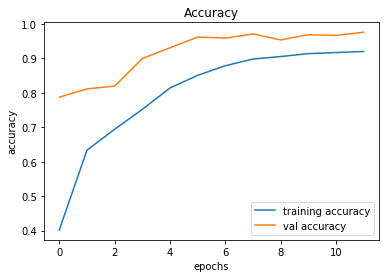

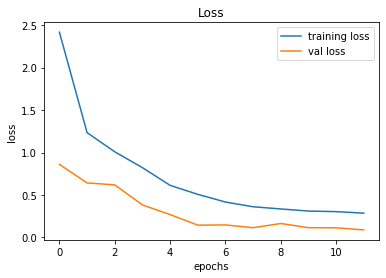

In [8]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
#An epoch is the number of times the iteration takes place to fit the model.
#with more epochs, the accuracy increases
#validation set is used to validate the model's performance
#dropout is the amount of units ignored randomly from the dataset.

## Testing Accuracy on Test Dataset

In [9]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)                     #creating numpy array of test data of images.
pred = model.predict_classes(X_test)  #predicting the classes for test dataset using trained model.


## Accuracy with the Test Data

In [10]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))        #finding accuracy for the test data       
model.save("traffic_classifier.h5") 


0.9401425178147268
